In [67]:

import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, gamma
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


In [53]:
file_path = 'insurance.csv'
insurance_df = pd.read_csv(file_path)

print(insurance_df.head())


    Age  Gender   BMI  Children Smoker     Region  Expenses
0  19.0  female  27.9         0    yes  southwest  16884.92
1  18.0    male  33.8         1     no  southeast   1725.55
2  28.0    male  33.0         3     no  southeast   4449.46
3  33.0    male  22.7         0     no  northwest  21984.47
4  32.0    male  28.9         0     no  northwest   3866.86


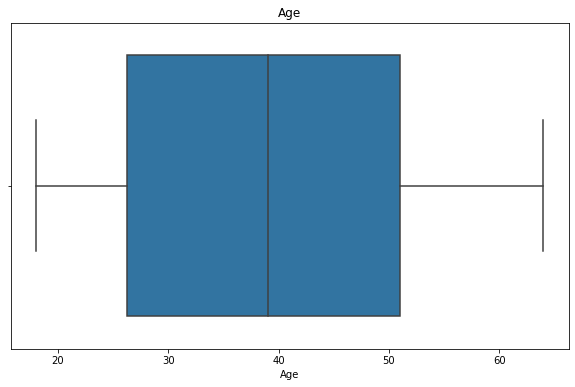

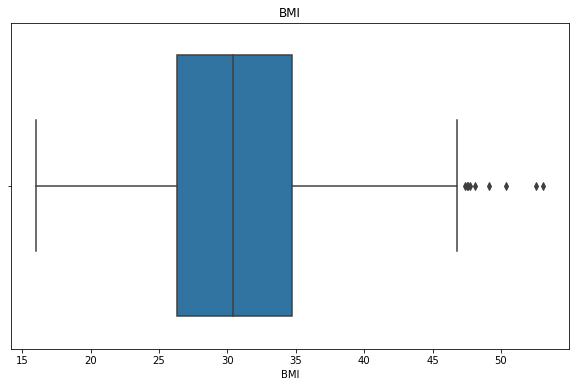

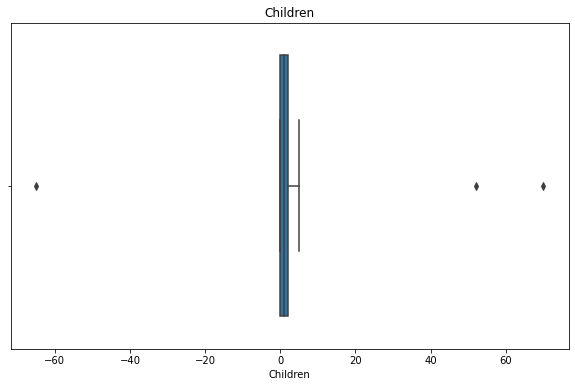

In [54]:
# Finding the outlings 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=insurance_df)
plt.title('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', data=insurance_df)
plt.title('BMI')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Children', data=insurance_df)
plt.title('Children')
plt.show()

In [55]:
def remove_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    df_no_outliers = df[(z_scores < 3)]
    return df_no_outliers

# removing the outlier
insurance_df_no_outliers = remove_outliers_zscore(insurance_df, 'Age')
insurance_df_no_outliers = remove_outliers_zscore(insurance_df_no_outliers, 'BMI')
insurance_df_no_outliers = remove_outliers_zscore(insurance_df_no_outliers, 'Children')
print(f'before removing : {insurance_df.shape}')
print(f'how many are removed : {insurance_df_no_outliers.shape}')

before removing : (1338, 7)
how many are removed : (0, 7)


In [56]:

# for missing values 
missing_values = insurance_df.isnull().sum()
print('Missing Values:')
print(missing_values)


insurance_df_no_missing = insurance_df.dropna() # if the whole row the values are missing , remove the whole rows 

mean_age = insurance_df['Age'].mean() # applying mean values to fill the missing values 
insurance_df['Age'].fillna(mean_age, inplace=True)

median_bmi = insurance_df['BMI'].median() # applying median values to fill the missing values 
insurance_df['BMI'].fillna(median_bmi, inplace=True)

insurance_df['Children'].fillna(0, inplace=True) # filling with zeros 


print(f'Shape of the original DataFrame: {insurance_df.shape}')
print(f'Shape of the DataFrame after handling missing values: {insurance_df_no_missing.shape}')
missing_values_after_imputation = insurance_df.isnull().sum()
print('\nMissing Values After Imputation:')
print(missing_values_after_imputation)


Missing Values:
Age         4
Gender      9
BMI         8
Children    0
Smoker      0
Region      2
Expenses    1
dtype: int64
Shape of the original DataFrame: (1338, 7)
Shape of the DataFrame after handling missing values: (1315, 7)

Missing Values After Imputation:
Age         0
Gender      9
BMI         0
Children    0
Smoker      0
Region      2
Expenses    1
dtype: int64


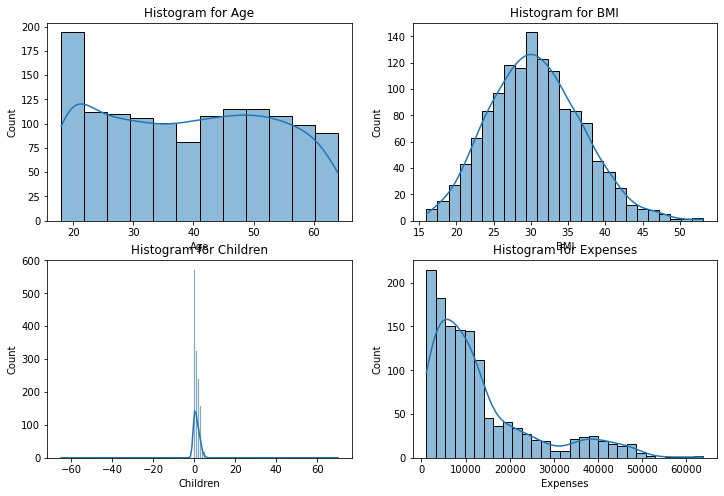

In [58]:
# numerical column
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(insurance_df[column], kde=True)
    plt.title(f'Histogram for {column}')


plt.show()

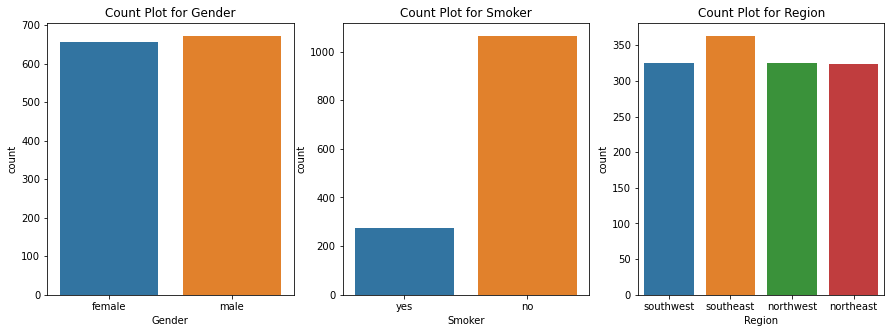

In [59]:
#  categorical_columns
categorical_columns = ['Gender', 'Smoker', 'Region']

plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, data=insurance_df)
    plt.title(f'Count Plot for {column}')

plt.show()

In [60]:
# (mean, median, mode, etc for numerical colums 
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']
descriptive_stats = insurance_df[numerical_columns].describe()
print('Descriptive Statistics:')
print(descriptive_stats)


variability_measures = insurance_df[numerical_columns].var()
print('\nVariability Measures:')
print(variability_measures)


mode_values = insurance_df[numerical_columns].mode().iloc[0]
print('\nMode Values:')
print(mode_values)


Descriptive Statistics:
               Age          BMI     Children      Expenses
count  1338.000000  1338.000000  1338.000000   1337.000000
mean     39.176912    30.675262     1.136024  13273.306111
std      14.020347     6.076644     3.194662  12114.083012
min      18.000000    16.000000   -65.000000   1121.870000
25%      27.000000    26.300000     0.000000   4738.270000
50%      39.000000    30.400000     1.000000   9377.900000
75%      51.000000    34.600000     2.000000  16657.720000
max      64.000000    53.100000    70.000000  63770.430000

Variability Measures:
Age         1.965701e+02
BMI         3.692560e+01
Children    1.020587e+01
Expenses    1.467510e+08
dtype: float64

Mode Values:
Age           18.00
BMI           27.60
Children       0.00
Expenses    1639.56
Name: 0, dtype: float64


In [61]:
# numerical columns for standard devia, variance, etc
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']
quartiles = insurance_df[numerical_columns].quantile([0.25, 0.5, 0.75])
print('Quartiles:')
print(quartiles)


Quartiles:
       Age   BMI  Children  Expenses
0.25  27.0  26.3       0.0   4738.27
0.50  39.0  30.4       1.0   9377.90
0.75  51.0  34.6       2.0  16657.72


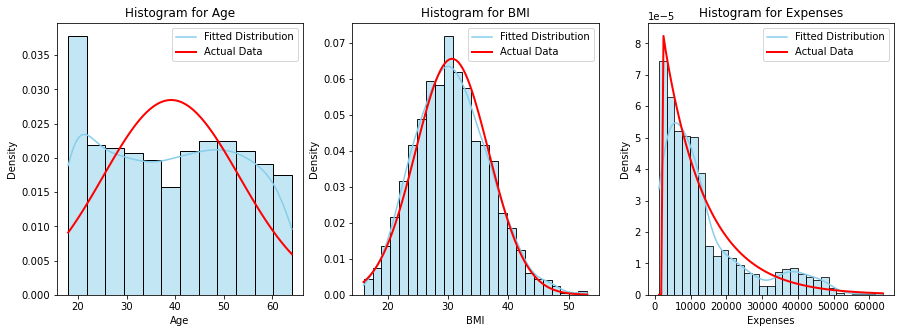

In [64]:
s_columns = ['Age', 'BMI', 'Expenses']

# for histrgrams 
plt.figure(figsize=(15, 5))
for i, column in enumerate(s_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(insurance_df[column], kde=True, stat='density', color='skyblue')
    plt.title(f'Histogram for {column}')
    if column == 'Expenses':
        param = gamma.fit(insurance_df[column].dropna())
        pdf_fitted = gamma.pdf(np.linspace(0, max(insurance_df[column]), 100), *param)
    else:
        mean, std = norm.fit(insurance_df[column].dropna())
        pdf_fitted = norm.pdf(np.linspace(min(insurance_df[column]), max(insurance_df[column]), 100), mean, std)

    plt.plot(np.linspace(min(insurance_df[column]), max(insurance_df[column]), 100), pdf_fitted, 'r-', linewidth=2)
    plt.legend(['Fitted Distribution', 'Actual Data'])

plt.show()


In [66]:

numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

# Z-score normalization
scaler_standard = StandardScaler()
insurance_df_standardized = pd.DataFrame(scaler_standard.fit_transform(insurance_df[numerical_columns]), columns=numerical_columns)

# Normalization
scaler_minmax = MinMaxScaler()
insurance_df_normalized = pd.DataFrame(scaler_minmax.fit_transform(insurance_df[numerical_columns]), columns=numerical_columns)

print('Standardized DataFrame:')
print(insurance_df_standardized.head())

print('\nNormalized DataFrame:')
print(insurance_df_normalized.head())


Standardized DataFrame:
        Age       BMI  Children  Expenses
0 -1.439655 -0.456880 -0.355734  0.298245
1 -1.511006  0.514413 -0.042594 -0.953607
2 -0.797490  0.382713  0.583684 -0.728668
3 -0.440732 -1.312936 -0.355734  0.719363
4 -0.512084 -0.292254 -0.355734 -0.776779

Normalized DataFrame:
        Age       BMI  Children  Expenses
0  0.021739  0.320755  0.481481  0.251611
1  0.000000  0.479784  0.488889  0.009636
2  0.217391  0.458221  0.503704  0.053115
3  0.326087  0.180593  0.481481  0.333010
4  0.304348  0.347709  0.481481  0.043816


In [69]:
# Linear Regression Modeling:
nan_rows = y[y.isnull()].index # to remove ny of the nan rows
X_imputed = X_imputed.drop(index=nan_rows)
y = y.drop(index=nan_rows)

# splitting the data to 80 and 20 percent 
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# model evalutation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('Model Coefficients:')
print('Intercept:', model.intercept_)
print('Coefficients:', dict(zip(features, model.coef_)))
print('\nPerformance Metrics:')
print('Mean Squared Error:', mse)
print('R-squared (R2):', r2)



Model Coefficients:
Intercept: -4469.830982243126
Coefficients: {'Age': 224.45401898014998, 'BMI': 276.4528212031858, 'Children': 175.85641794451627}

Performance Metrics:
Mean Squared Error: 159928124.43836826
R-squared (R2): 0.1427458718787501


In [70]:
#predictions 
y_pred = model.predict(X_test)

m = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('Model Coefficients:')
print('Intercept:', model.intercept_)
print('Coefficients:', dict(zip(features, model.coef_)))

print('\nPerformance Metrics:')
print('Mean Squared Error:', m)
print('R-squared (R2):', r2)



Model Coefficients:
Intercept: -4469.830982243126
Coefficients: {'Age': 224.45401898014998, 'BMI': 276.4528212031858, 'Children': 175.85641794451627}

Performance Metrics:
Mean Squared Error: 159928124.43836826
R-squared (R2): 0.1427458718787501
